<a href="https://colab.research.google.com/github/GaneshSparkz/Drowsiness-Detection-System-CNN-OpenCV/blob/main/DrowsinessDetectorTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import plot_model

Load the Preprocessed Dataset

In [ ]:
X_train = np.load("drive/MyDrive/X_train.npy")
y_train = np.load("drive/MyDrive/y_train.npy")

X_test = np.load("drive/MyDrive/X_test.npy")
y_test = np.load("drive/MyDrive/y_test.npy")

Hyperparameters and Data Augmentation

In [ ]:
# Hyperparameters
LEARNING_RATE = 1e-3
EPOCHS = 15
BATCH_SIZE = 16

In [ ]:
# Data Augmentation
data_gen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    shear_range=0.1,
    zoom_range=0.2
)
data_gen.fit(X_train)

Build the Model

In [ ]:
model = Sequential()
# first CNN layer
model.add(Conv2D(32, (3, 3), input_shape=(24, 24, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D((1, 1)))
# second CNN layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D((1, 1)))
# third CNN layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D((1, 1)))
model.add(Dropout(0.25))
# FC -> relu layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# final layer -> sigmoid classification
model.add(Dense(1))
model.add(Activation('sigmoid'))

Compile and Visualize the model

In [ ]:
model.compile(
    optimizer=RMSprop(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
plot_model(model, to_file="model.png", show_shapes=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 64)       

Train the model

In [ ]:
history = model.fit_generator(
    data_gen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    shuffle=True
)

Epoch 1/15
78/78 [==============================] - 1s 9ms/step - loss: 0.5009 - accuracy: 0.7650 - val_loss: 0.1874 - val_accuracy: 0.9174
Epoch 2/15
78/78 [==============================] - 1s 7ms/step - loss: 0.3452 - accuracy: 0.8598 - val_loss: 0.1942 - val_accuracy: 0.9358
Epoch 3/15
78/78 [==============================] - 1s 7ms/step - loss: 0.3056 - accuracy: 0.8849 - val_loss: 0.1368 - val_accuracy: 0.9404
Epoch 4/15
78/78 [==============================] - 1s 7ms/step - loss: 0.2280 - accuracy: 0.9182 - val_loss: 0.1439 - val_accuracy: 0.9404
Epoch 5/15
78/78 [==============================] - 1s 7ms/step - loss: 0.2239 - accuracy: 0.9238 - val_loss: 0.1345 - val_accuracy: 0.9450
Epoch 6/15
78/78 [==============================] - 1s 7ms/step - loss: 0.2079 - accuracy: 0.9360 - val_loss: 0.1142 - val_accuracy: 0.9404
Epoch 7/15
78/78 [==============================] - 1s 7ms/step - loss: 0.1860 - accuracy: 0.9327 - val_loss: 0.0711 - val_accuracy: 0.9725
Epoch 8/15
78/78 [==

Plot the Results

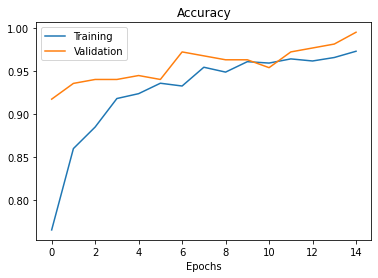

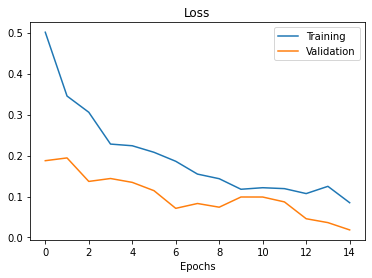

In [ ]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

Save the trained model

In [ ]:
model.save("trained_model.h5")